In [1]:
!pip install fastai

In [2]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision import *
from fastai.collab import *
from io import BytesIO
import pandas as pd
import requests
import os

In [3]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.177074,2.549679,01:12


epoch,train_loss,valid_loss,time
0,1.797966,1.445647,01:18
1,1.608174,1.313490,01:18
2,1.449259,1.134780,01:20
3,1.290436,0.863885,01:18
4,1.147434,0.795088,01:18
5,1.028504,0.741849,01:18
6,0.935012,0.699249,01:18
7,0.862942,0.703591,01:18


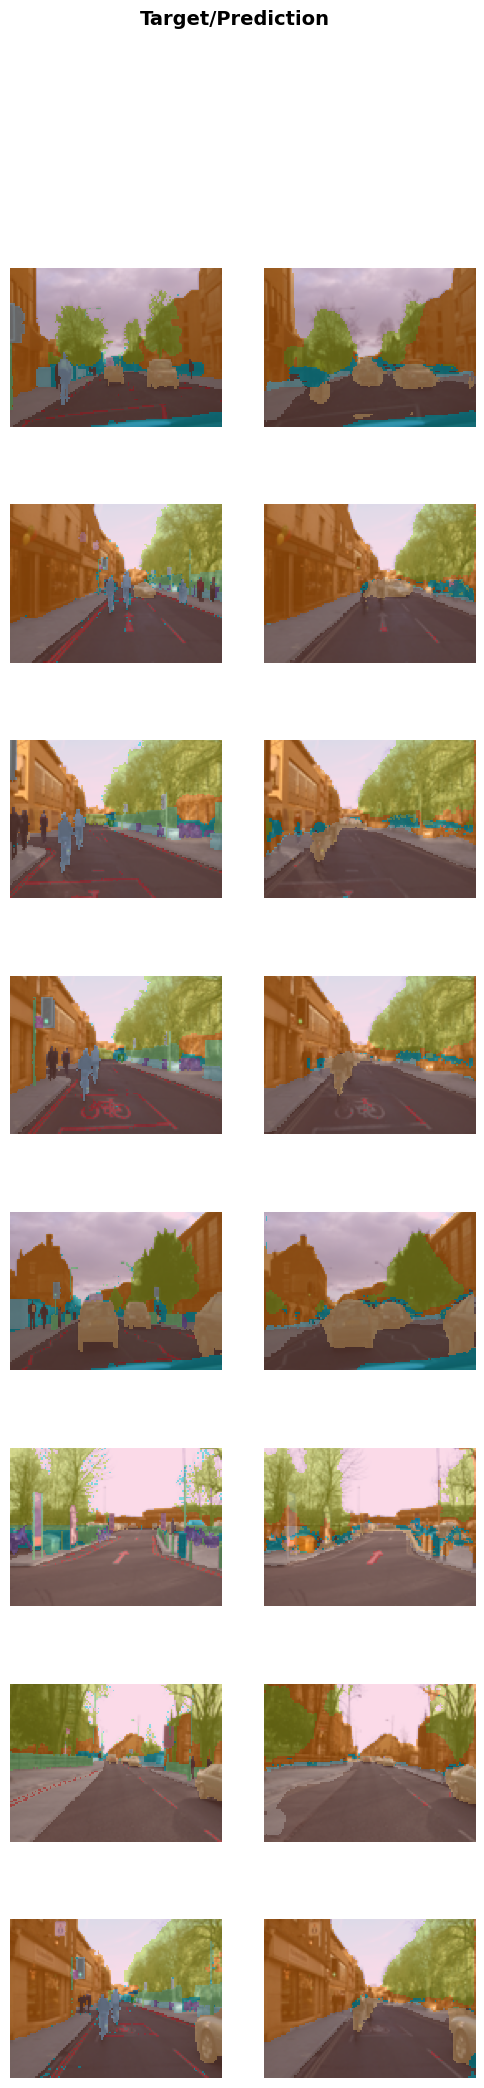

In [4]:
learn.show_results()

In [5]:
def save_image(image_url, save_path):
  response = requests.get(image_url)
  image = Image.open(BytesIO(response.content))
  image.save(save_path)

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()


dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.163868,0.021194,0.008796,32:02


epoch,train_loss,valid_loss,error_rate,time
0,0.049469,0.040336,0.014885,47:52
1,0.025060,0.015451,0.005413,48:15


In [16]:
image_url = "https://cdn.abcotvs.com/dip/images/369969_102814-cc-dog-life-1.jpg"
dog_image_file_path = "/content/dog.jpg"
save_image(image_url, dog_image_file_path)

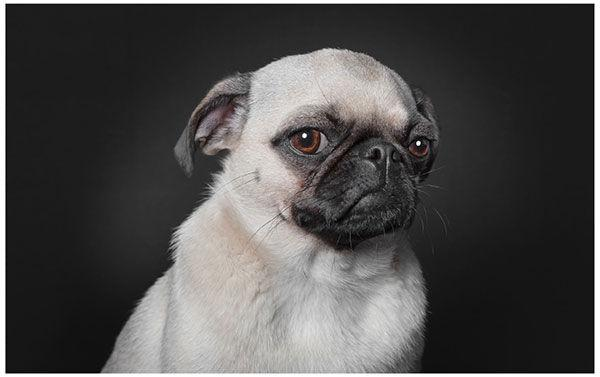

In [17]:
dog_img = PILImage.create(dog_image_file_path)
dog_img

In [18]:
is_cat,_,probs = learn.predict(dog_img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a dog: 0.000002
